# heatmap of Bitcoin


In [1]:
# import the dependance 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})

pd.set_option('expand_frame_repr', False)  # 当列太多时不换行
# pd.set_option('display.max_rows', 1000)  # 最多显示行数.
# pd.set_option('precision', 6)  # 浮点数的精度
pd.set_option('display.float_format', lambda x: '%.4f' % x)  # 设置不用科学计数法，保留两位小数.

In [25]:
df = pd.read_csv('./asset/binance_btc_1min.csv')
df.head()

,open_time,open,high,low,close,volume
0,2019-06-07 14:47:00,7928.7500,7932.0300,7925.5900,7925.6000,14.0975
1,2019-06-07 14:48:00,7926.1600,7926.6600,7912.1400,7915.2200,30.8772
2,2019-06-07 14:49:00,7915.2200,7921.1500,7911.0000,7919.4500,27.4070
3,2019-06-07 14:50:00,7918.4500,7919.1200,7903.7600,7910.9600,22.0303
4,2019-06-07 14:51:00,7910.9600,7915.5200,7907.1100,7915.5200,17.3316


In [26]:
# cut the reducdant info
df['open_time'] = pd.to_datetime(df['open_time'])
df = df[df['open_time']>=pd.to_datetime('2019-06-07 15:00:00')]
df.head()

,open_time,open,high,low,close,volume
13,2019-06-07 15:00:00,7916.0000,7924.6000,7916.0000,7920.9600,22.1088
14,2019-06-07 15:01:00,7920.9600,7924.7000,7920.9600,7921.0700,14.5387
15,2019-06-07 15:02:00,7921.0700,7930.0000,7921.0700,7926.2200,12.5767
16,2019-06-07 15:03:00,7927.4400,7928.9300,7924.1500,7926.3800,9.0886
17,2019-06-07 15:04:00,7924.6800,7930.9000,7924.0700,7930.9000,9.6222


In [47]:
# sampling by 1h
df.set_index('open_time', inplace=True)
df_s = df.resample(rule='1H').agg({'open': 'first','high': 'max','low': 'min',
                                   'close': 'last','volume': 'sum',})
df_s.head()

,open,high,low,close,volume
open_time,,,,,
2019-06-07 15:00:00,7916.0000,7942.4500,7901.1600,7928.8600,942.1809
2019-06-07 16:00:00,7928.0000,8094.7000,7890.0000,8042.7900,3495.3919
2019-06-07 17:00:00,8043.1500,8084.3700,8033.2100,8065.4800,1498.9502
2019-06-07 18:00:00,8065.5000,8100.0000,8050.7800,8055.3300,1303.1348
2019-06-07 19:00:00,8055.3300,8071.6200,7928.0100,7937.8500,2426.6107


In [48]:
df_s['date'] = df_s.index.date
df_s['hour'] = df_s.index.time
df_s.head()

,open,high,low,close,volume,date,hour
open_time,,,,,,,
2019-06-07 15:00:00,7916.0000,7942.4500,7901.1600,7928.8600,942.1809,2019-06-07,15:00:00
2019-06-07 16:00:00,7928.0000,8094.7000,7890.0000,8042.7900,3495.3919,2019-06-07,16:00:00
2019-06-07 17:00:00,8043.1500,8084.3700,8033.2100,8065.4800,1498.9502,2019-06-07,17:00:00
2019-06-07 18:00:00,8065.5000,8100.0000,8050.7800,8055.3300,1303.1348,2019-06-07,18:00:00
2019-06-07 19:00:00,8055.3300,8071.6200,7928.0100,7937.8500,2426.6107,2019-06-07,19:00:00


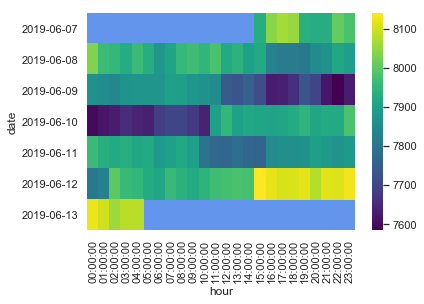

In [49]:
result = df_s.pivot(index='date', columns='hour', values='close')
sns.heatmap(result, annot=False, fmt="g", cmap='viridis', cbar=True)
plt.show()